# Motion of a Pendulum
### Fourth Order Runge-Kutta Method

Computational Physics

Micheal Jones

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, Math, Latex

%matplotlib inline

In [2]:
theta_0 = 0.1
omega_0 = 0.0
g = 10.0
m = 0.15
L = 1.0
d = 0.07
c = 0.012

dt = 0.01
t = np.arange(0,50,dt)

angle = np.zeros(len(t))
angVel = np.zeros(len(t))
pE = np.zeros(len(t))
kE = np.zeros(len(t))
totalEnergy = np.zeros(len(t))

angle[0] = theta_0
angVel[0] = omega_0

In [3]:
def omegaStep(theta, omega, dt, c, g, L):
    return omega+(-g/L)*np.sin(theta)*dt-c*L**2*omega**(2)*np.sign(omega)*dt

def thetaStep(theta,omega,dt):
    return theta + omega*dt

def accel(theta, omega, dt, c, m, g, L): 
    return -1*(g*np.sin(theta)/L + (c*L/m) * omega**2 *np.sign(omega))

def rungeKutta4(alpha, theta, omega, dt, c, m, g, L):
    k1v = accel(theta, omega, dt, c, m, g, L )*dt
    k1x = omega*dt
    k2v = accel(theta + k1x/2, omega + k1v/2, dt, c, m, g, L )*dt
    k2x = (omega + k1v/2)*dt
    k3v = accel(theta + k2x/2, omega + k2v/2, dt, c, m, g, L)*dt
    k3x = (omega + k2v/2)*dt
    k4v = accel(theta + k3x, omega + k3v, dt, c, m, g, L)*dt
    k4x = (omega + k3v)*dt
    omega = omega + (k1v + 2*k2v + 2*k3v + k4v)/6
    theta = theta + (k1x + 2*k2x + 2*k3x + k4x)/6
    return theta, omega

def energy(theta, omega, m, g, L):
    pE = m*g*L*(1 - np.cos(theta))
    kE = (m/2)*(L*omega)**2
    totalEnergy = pE + kE
    return pE, kE, totalEnergy

pE[0], kE[0], totalEnergy[0] = energy(angle[0], angVel[0], m, g, L)

i = 0

In [4]:
for i in range(1,len(t)):  
    angle[i], angVel[i] = rungeKutta4(accel, angle[i-1], angVel[i-1], dt, c, m, g, L)
    pE[i], kE[i], totalEnergy[i] = energy(angle[i-1], angVel[i-1], m, g, L)
    i = i+1

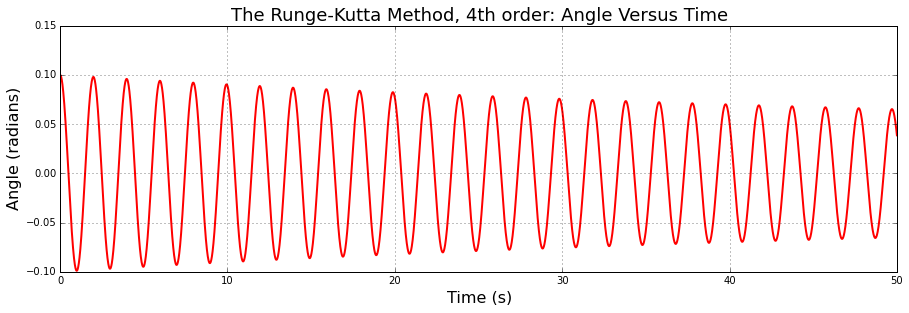

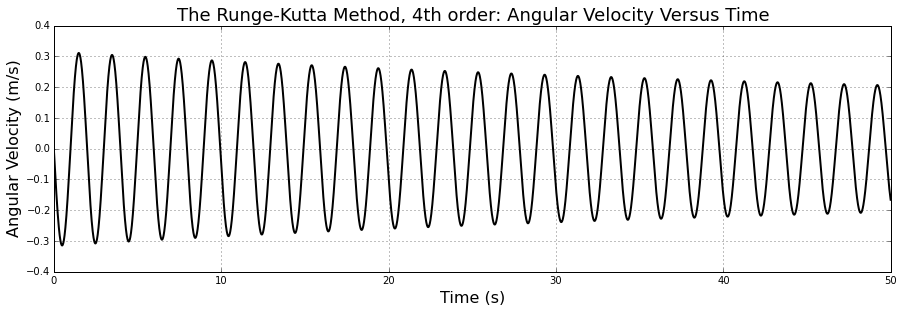

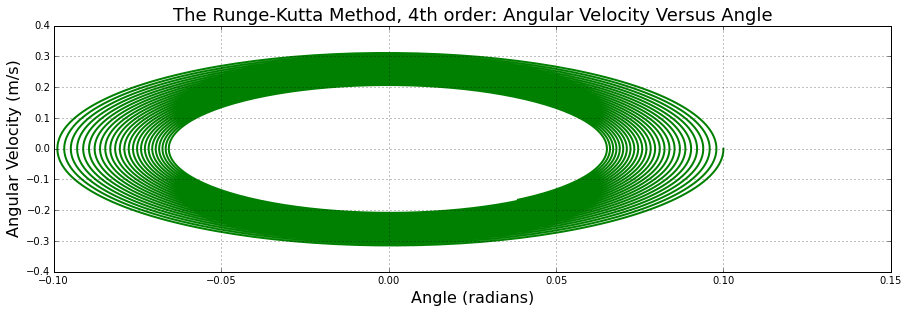

In [5]:
plt.figure(1)
plt.figure(figsize=(15,15))
plt.subplot(311)
plt.plot(t, angle, color = 'red', linewidth= 2.0)
plt.title('The Runge-Kutta Method, 4th order: Angle Versus Time', fontsize = 18)
plt.ylabel('Angle (radians)', fontsize = 16)
plt.grid(True)
plt.xlabel('Time (s)', fontsize = 16)
plt.show()

plt.figure(2)
plt.figure(figsize=(15,15))
plt.subplot(312)
plt.plot(t, angVel, color = 'black', linewidth= 2.0)
plt.title('The Runge-Kutta Method, 4th order: Angular Velocity Versus Time', fontsize = 18)
plt.ylabel('Angular Velocity (m/s)', fontsize = 16)
plt.grid(True)
plt.xlabel('Time (s)', fontsize = 16)
plt.show()

plt.figure(3)
plt.figure(figsize=(15,15))
plt.subplot(313)
plt.plot(angle, angVel , color = 'green', linewidth= 2.0)
plt.title('The Runge-Kutta Method, 4th order: Angular Velocity Versus Angle', fontsize = 18)
plt.ylabel('Angular Velocity (m/s)', fontsize = 16)
plt.xlabel('Angle (radians)', fontsize = 16)
plt.grid(True)
plt.show ()

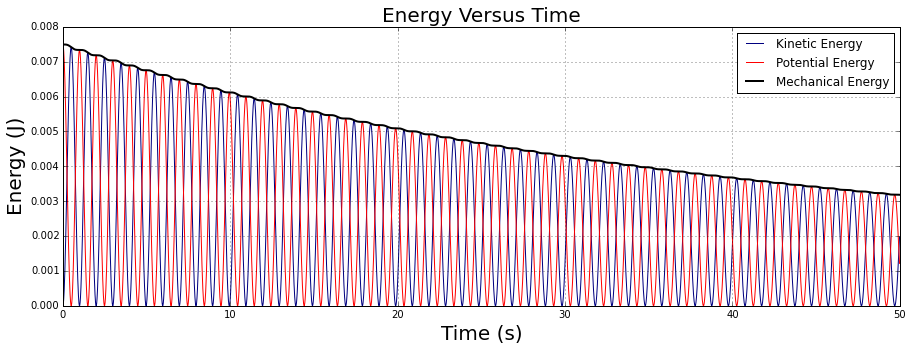

In [7]:
"""
plt.figure(4)
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(t, totalEnergy, color='black', linewidth=2.0)
plt.ylabel('Mechanical Energy (J)', size = '20')
plt.title('Mechanical Energy Versus Time', size = '20')
plt.grid(True)
plt.show()
"""
plt.figure(5)
plt.figure(figsize=(15,5))
#plt.subplot(212)
kinetic, = plt.plot(t, kE, color='navy', linewidth=1.0)
potential, = plt.plot(t, pE, color='red', linewidth=1.0)
mechanical, = plt.plot(t, totalEnergy, color='black', linewidth=2.0)
plt.ylabel('Energy (J)', size = '20')
plt.title('Energy Versus Time', size = '20')
plt.xlabel('Time (s)', size = '20')
plt.legend([kinetic, potential, mechanical], ["Kinetic Energy", "Potential Energy", "Mechanical Energy"])
plt.grid(True)
plt.show()
